# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import model_selection
import plotly.express as px
from sklearn import metrics

# Step 2 : Data Import

In [2]:
new = pd.read_csv(r"C:\Users\gajan\OneDrive\Documents\Projects\CarPrice_Assignment.csv")
new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data = new.drop(['car_ID'], axis = 1)
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Step 3 : Data Pre-Processing
* Data Type and conversion.
* Identifying & Treatment Missing Values.
* Identifying & Treatment of Outliers.

### Data Type and conversion

In [4]:
# Checking The Information Of The Given Dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Univariate Analysis

In [5]:
# Statistical Analysis Of Dataset
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Checking Number Of Rows And Columns.
data.shape

(205, 25)

#### In Dataset There Are 1470 Rows And 35 Columns Are Present.

In [7]:
# Checking Number Of Missing Values.
data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### There Is No Any Missing Values In Data.

### Identifying & Treatment of Outliers

<AxesSubplot:>

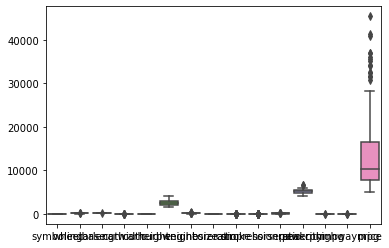

In [8]:
sns.boxplot(data = data)

### Removing Outliers By Using Winsorizing Technique

In [9]:
def outliers(data):
    a = data.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        data[i] = np.where(data[i]>upper_limit,upper_limit,data[i])
        data[i] = np.where(data[i]<lower_limit,lower_limit,data[i])

In [10]:
outliers(data)

<AxesSubplot:>

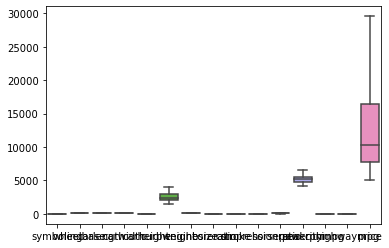

In [11]:
sns.boxplot(data = data)

# Step 4 : Breaking Data into Two Parts
* Quantitative Variable
* Qualitative Variable

In [12]:
data.select_dtypes(include=[np.number]).columns.tolist()

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [13]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


In [14]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


## Converting qualitative Variable into number

In [15]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5


## Combining the data set

In [16]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Step 5 : Data Partition

In [27]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('price', axis = 1)
Y = Final_combined[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestRegressor(n_estimators=20, # make 20 tress
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=20)

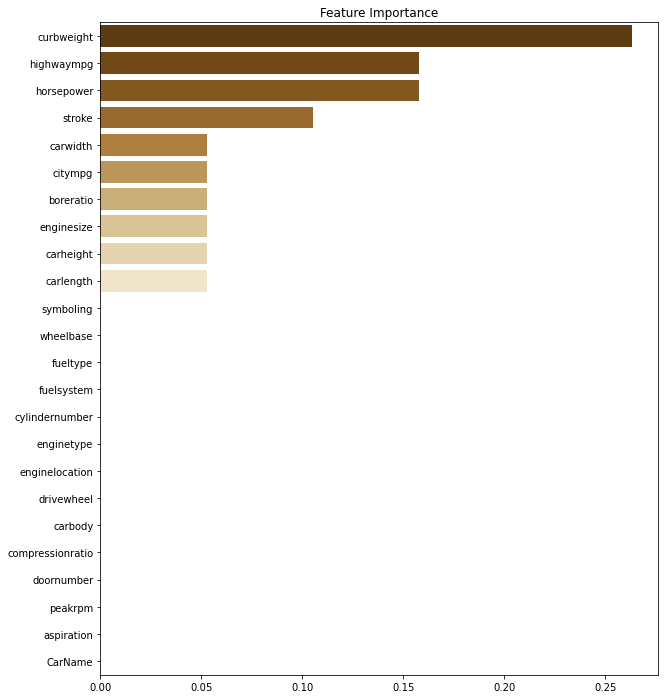

In [31]:
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

In [32]:
from sklearn.tree import export_graphviz
import pydot

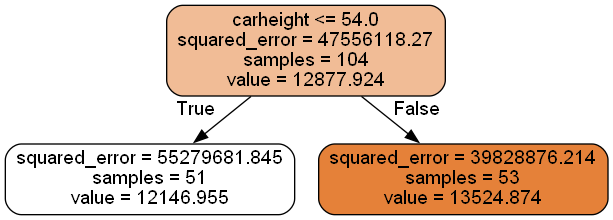

In [52]:
tree = Model.estimators_[1]  # specify the tree number   
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

 # Step 6 : Predictions on Train Dataset

In [34]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,4,1,0,0,3,1,0,3,2,5,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
157,116,1,0,0,2,1,0,3,2,1,...,2109.0,98.0,3.19,3.03,9.0,70.0,4800.0,30.0,37.0,7198.0
81,63,1,0,1,2,1,0,3,2,1,...,2328.0,122.0,3.35,3.46,8.5,88.0,5000.0,25.0,32.0,8499.0
32,39,1,0,1,2,1,0,3,2,0,...,1837.0,79.0,2.91,3.07,10.1,60.0,5500.0,38.0,42.0,5399.0
99,81,1,0,0,2,1,0,3,2,1,...,2324.0,120.0,3.33,3.47,8.5,97.0,5200.0,27.0,34.0,8949.0


In [35]:
train['Predicted']=Model.predict(X_train)
train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted
3,4,1,0,0,3,1,0,3,2,5,...,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,12888.320154
157,116,1,0,0,2,1,0,3,2,1,...,98.0,3.19,3.03,9.0,70.0,4800.0,30.0,37.0,7198.0,8919.926866
81,63,1,0,1,2,1,0,3,2,1,...,122.0,3.35,3.46,8.5,88.0,5000.0,25.0,32.0,8499.0,10328.035546
32,39,1,0,1,2,1,0,3,2,0,...,79.0,2.91,3.07,10.1,60.0,5500.0,38.0,42.0,5399.0,8919.926866
99,81,1,0,0,2,1,0,3,2,1,...,120.0,3.33,3.47,8.5,97.0,5200.0,27.0,34.0,8949.0,11422.635070


# Step 7 : Predictions on Test Dataset

In [37]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,120,1,0,0,3,1,0,3,2,1,...,2094.0,98.0,3.19,3.03,9.0,70.0,4800.0,38.0,47.0,7738.0
186,131,1,0,0,3,1,0,3,2,5,...,2275.0,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8495.0
59,53,1,0,1,2,1,0,3,2,1,...,2385.0,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,8845.0
165,114,1,0,1,3,2,0,0,2,5,...,2265.0,98.0,3.24,3.08,9.4,112.0,6550.0,26.0,29.0,9298.0
140,107,1,0,1,2,0,0,4,2,1,...,2240.0,108.0,3.62,2.66,8.7,73.0,4400.0,26.0,31.0,7603.0


In [38]:
test['Predicted']=Model.predict(X_test)
test.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted
160,120,1,0,0,3,1,0,3,2,1,...,98.0,3.19,3.03,9.0,70.0,4800.0,38.0,47.0,7738.0,8919.926866
186,131,1,0,0,3,1,0,3,2,5,...,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8495.0,9478.911367
59,53,1,0,1,2,1,0,3,2,1,...,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,8845.0,11617.547045
165,114,1,0,1,3,2,0,0,2,5,...,98.0,3.24,3.08,9.4,112.0,6550.0,26.0,29.0,9298.0,11497.040413
140,107,1,0,1,2,0,0,4,2,1,...,108.0,3.62,2.66,8.7,73.0,4400.0,26.0,31.0,7603.0,10563.760412


In [43]:
def model_train(Model, X_train, X_test, y_train, y_test):
    Model.fit(X_train, y_train)
    trainpred=Model.predict(X_train)
    testpred = Model.predict(X_test)
    print("R2 Score for train data :", r2_score(y_train, trainpred))
    print("R2 Score for test  data :", r2_score(y_test, testpred))

In [44]:
demodel=DecisionTreeRegressor(max_depth = 2)
model_train(demodel, X_train, X_test, y_train, y_test)

R2 Score for train data : 0.8799709972184526
R2 Score for test  data : 0.8601715486984011


### Here The Accuracy of Train Data And Test Data Is Good, So We Can Say That Our Model Is Good Fit.

# Finish